In [10]:
import os
import json
import pandas as pd
from pathlib import Path

# =====================================
# 1️⃣ 경로 설정
# =====================================
BASE_DIR = Path("/Users/apple/Documents/ai_engineer/Tablet-Detection-with-Object-Detection/")
anno_dir = BASE_DIR / "dataset" / "1_project"/"train_annotations"

# =====================================
# 2️⃣ JSON 탐색 (하위 폴더 포함)
# =====================================
json_files = list(anno_dir.rglob("*.json"))
print(f"✅ Found {len(json_files)} JSON files under {anno_dir}")

# =====================================
# 3️⃣ 데이터 수집
# =====================================
records = []

for json_file in json_files:
    try:
        with open(json_file, "r", encoding="utf-8") as f:
            data = json.load(f)

        if "images" not in data or "annotations" not in data:
            print(f"⚠️ Skipped (missing keys): {json_file.name}")
            continue

        # 이미지 정보
        for img in data["images"]:
            img_id = img.get("id")
            file_name = img.get("file_name")
            width = img.get("width")
            height = img.get("height")
            dl_idx = img.get("dl_idx")
            dl_name = img.get("dl_name")

            # annotation이 여러 개일 수도 있음
            anns = data.get("annotations", [])
            if not anns:
                records.append({
                    "id": img_id,
                    "file_name": file_name,
                    "width": width,
                    "height": height,
                    "dl_idx": dl_idx,
                    "dl_name": dl_name,
                    "bbox": None
                })
            else:
                for ann in anns:
                    bbox = ann.get("bbox")
                    records.append({
                        "id": img_id,
                        "file_name": file_name,
                        "width": width,
                        "height": height,
                        "dl_idx": dl_idx,
                        "dl_name": dl_name,
                        "bbox": bbox
                    })
    except Exception as e:
        print(f"❌ Error reading {json_file.name}: {e}")

# =====================================
# 4️⃣ Pandas DataFrame 생성
# =====================================
train_df = pd.DataFrame(records)
print(f"\n✅ train_df 생성 완료! 총 {len(train_df)}개 row\n")

# ✅ 상위 5개 미리보기
print(train_df.head())

# (원하면 CSV로 저장)
# train_df.to_csv(BASE_DIR / "train_annotations.csv", index=False, encoding="utf-8-sig")

✅ Found 4526 JSON files under /Users/apple/Documents/ai_engineer/Tablet-Detection-with-Object-Detection/dataset/1_project/train_annotations

✅ train_df 생성 완료! 총 4526개 row

   id                                          file_name  width  height  \
0  29  K-003483-025367-027777-035206_0_2_0_2_75_000_2...    976    1280   
1  30  K-003483-025367-027777-035206_0_2_0_2_70_000_2...    976    1280   
2  28  K-003483-025367-027777-035206_0_2_0_2_90_000_2...    976    1280   
3  30  K-003483-025367-027777-035206_0_2_0_2_70_000_2...    976    1280   
4  28  K-003483-025367-027777-035206_0_2_0_2_90_000_2...    976    1280   

  dl_idx         dl_name                  bbox  
0  27776       카나브정 60mg  [145, 775, 180, 206]  
1  27776       카나브정 60mg  [638, 293, 177, 196]  
2  27776       카나브정 60mg  [176, 812, 177, 199]  
3  25366  자누메트정 50/850mg  [566, 726, 409, 481]  
4  25366  자누메트정 50/850mg    [16, 59, 422, 463]  


In [11]:
train_df

,id,file_name,width,height,dl_idx,dl_name,bbox
0,29,K-003483-025367-027777-035206_0_2_0_2_75_000_2...,976,1280,27776,카나브정 60mg,"[145, 775, 180, 206]"
1,30,K-003483-025367-027777-035206_0_2_0_2_70_000_2...,976,1280,27776,카나브정 60mg,"[638, 293, 177, 196]"
2,28,K-003483-025367-027777-035206_0_2_0_2_90_000_2...,976,1280,27776,카나브정 60mg,"[176, 812, 177, 199]"
3,30,K-003483-025367-027777-035206_0_2_0_2_70_000_2...,976,1280,25366,자누메트정 50/850mg,"[566, 726, 409, 481]"
4,28,K-003483-025367-027777-035206_0_2_0_2_90_000_2...,976,1280,25366,자누메트정 50/850mg,"[16, 59, 422, 463]"
...,...,...,...,...,...,...,...
4521,1490,K-003351-020014-020238_0_2_0_2_75_000_200.png,976,1280,3350,일양하이트린정 2mg,"[345, 186, 185, 191]"
4522,1491,K-003351-020014-020238_0_2_0_2_90_000_200.png,976,1280,3350,일양하이트린정 2mg,"[185, 249, 188, 183]"
4523,1489,K-003351-020014-020238_0_2_0_2_70_000_200.png,976,1280,3350,일양하이트린정 2mg,"[401, 846, 191, 196]"
4524,1490,K-003351-020014-020238_0_2_0_2_75_000_200.png,976,1280,20237,플라빅스정 75mg,"[529, 731, 231, 229]"


In [14]:
# id별 총 개수
count_df = train_df.groupby("id").size().reset_index(name="count")

# 상위 10개 미리보기
print(count_df.head(10))

   id  count
0   1      2
1   2      4
2   3      3
3   4      3
4   5      2
5   6      4
6   7      4
7   8      3
8   9      3
9  10      3


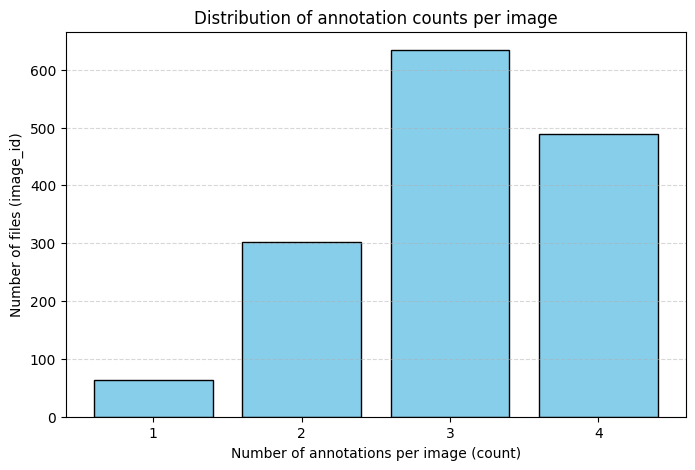

In [16]:
import matplotlib.pyplot as plt

# id별 annotation 개수 집계
count_df = train_df.groupby("id").size().reset_index(name="count")

# ✅ 개수(count)별 이미지 수 집계 (컬럼 이름 충돌 방지)
freq_df = count_df["count"].value_counts().sort_index()
freq_df = freq_df.rename_axis("annotation_count").reset_index(name="file_count")

# ✅ 막대그래프 시각화
plt.figure(figsize=(8, 5))
plt.bar(freq_df["annotation_count"], freq_df["file_count"], color="skyblue", edgecolor="black")
plt.xlabel("Number of annotations per image (count)")
plt.ylabel("Number of files (image_id)")
plt.title("Distribution of annotation counts per image")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.xticks(freq_df["annotation_count"])
plt.show()

In [19]:
#file_name은 같은데 id가 틀린 경우는 없는지 검사
# file_name 기준으로 id 개수를 세기
dup_check = train_df.groupby("file_name")["id"].nunique().reset_index(name="unique_id_count")

# id가 1개보다 많은 file_name만 추출
conflicts = dup_check[dup_check["unique_id_count"] > 1]

print(f"⚠️ id가 서로 다른 file_name 개수: {len(conflicts)}개\n")
print(conflicts.head())

⚠️ id가 서로 다른 file_name 개수: 0개

Empty DataFrame
Columns: [file_name, unique_id_count]
Index: []


In [20]:
# dl_idx별로 dl_name의 고유 개수를 계산
name_check = train_df.groupby("dl_idx")["dl_name"].nunique().reset_index(name="unique_name_count")

# 이름이 2개 이상인 dl_idx만 필터링
dup_dlidx = name_check[name_check["unique_name_count"] > 1]

print(f"⚠️ 이름이 2개 이상 매핑된 dl_idx 개수: {len(dup_dlidx)}개\n")
print(dup_dlidx.head())

⚠️ 이름이 2개 이상 매핑된 dl_idx 개수: 0개

Empty DataFrame
Columns: [dl_idx, unique_name_count]
Index: []


In [21]:
#카테고리 확인
unique_dl_idx_count = train_df["dl_idx"].nunique()
print(f"✅ dl_idx의 고유 개수: {unique_dl_idx_count}")

✅ dl_idx의 고유 개수: 73


In [23]:
import pandas as pd

mapping = pd.read_csv("/Users/apple/Documents/ai_engineer/Tablet-Detection-with-Object-Detection/data/yolo_mapping.csv")

mapping["categories_id"] = mapping["categories_id"].astype(str).str.strip()
train_df["dl_idx"] = train_df["dl_idx"].astype(str).str.strip()

unmapped_dlidx = mapping[~mapping["categories_id"].isin(train_df["dl_idx"])]
print(f"⚠️ 이미지에 매핑되지 않은 dl_idx 개수: {len(unmapped_dlidx)}개\n")
print(unmapped_dlidx.head())

⚠️ 이미지에 매핑되지 않은 dl_idx 개수: 0개

Empty DataFrame
Columns: [class_id, categories_id, categories_name]
Index: []


In [26]:
import pandas as pd
import numpy as np

def is_invalid_bbox(bbox):
    """
    bbox 유효성 검사:
    - None, NaN
    - 리스트/튜플/배열이 아님
    - 길이가 4가 아님
    - 4개 값 중 정수 또는 실수가 아닌 경우
    - NaN 포함
    """
    # None 처리
    if bbox is None:
        return True

    # numpy 배열인 경우 list로 변환
    if isinstance(bbox, np.ndarray):
        bbox = bbox.tolist()

    # 리스트나 튜플이 아닌 경우
    if not isinstance(bbox, (list, tuple)):
        return True

    # 요소 수가 4가 아닌 경우
    if len(bbox) != 4:
        return True

    # 각 요소 검사
    for val in bbox:
        # 값이 정수나 실수가 아닌 경우
        if not isinstance(val, (int, float, np.integer, np.floating)):
            return True
        # NaN 검사 (np.isnan()을 안전하게 사용)
        if isinstance(val, (float, np.floating)) and np.isnan(val):
            return True

    return False


# ✅ 유효하지 않은 bbox 행 필터링
invalid_bbox = train_df[train_df["bbox"].apply(is_invalid_bbox)]

print(f"⚠️ bbox가 없거나, 4개 정수가 아닌 경우: {len(invalid_bbox)}개\n")
print(invalid_bbox[["id", "file_name", "dl_idx", "dl_name", "bbox"]].head(10))

⚠️ bbox가 없거나, 4개 정수가 아닌 경우: 0개

Empty DataFrame
Columns: [id, file_name, dl_idx, dl_name, bbox]
Index: []


In [28]:
# dl_idx별 등장 횟수 계산
dl_idx_count = (
    train_df.groupby(["dl_idx", "dl_name"])
    .size()
    .reset_index(name="count")
    .sort_values(by="count", ascending=True)  # 건수가 적은 순으로 정렬
)

# 상위 몇 개 확인
print(dl_idx_count)

   dl_idx             dl_name  count
55  33877         브린텔릭스정 20mg      7
46  29870          렉사프로정 15mg      9
3   12419        자이프렉사정 2.5mg      9
30  23202          쿠에타핀정 25mg     10
41  27992         졸로푸트정 100mg     11
..    ...                 ...    ...
9   16547         가바토파정 100mg    143
32   2482         뮤테란캡슐 100mg    172
15   1899          보령부스파정 5mg    180
54   3350         일양하이트린정 2mg    240
58   3482  기넥신에프정(은행엽엑스)(수출용)    514

[73 rows x 3 columns]


In [36]:
import pandas as pd

# ✅ dl_idx별 등장 횟수 계산
dl_idx_count = (
    train_df.groupby("dl_idx")
    .size()
    .reset_index(name="count")  # 등장 횟수를 count로 이름 지정
    .sort_values(by="count", ascending=True)  # 건수가 적은 순으로 정렬
    .reset_index(drop=True)
)

# ✅ 결과 출력
print("✅ dl_idx별 등장 횟수 집계 결과:")
print(dl_idx_count.head(10))

# ✅ CSV로 저장
output_path = "/Users/apple/Documents/ai_engineer/Tablet-Detection-with-Object-Detection/data/project_file_category_by_cnt.csv"
dl_idx_count.to_csv(output_path, index=False, encoding="utf-8-sig")

print(f"\n💾 저장 완료 → {output_path}")

✅ dl_idx별 등장 횟수 집계 결과:
  dl_idx  count
0  33877      7
1  29870      9
2  12419      9
3  23202     10
4  27992     11
5  12246     16
6  16687     16
7  32309     18
8  33879     21
9  18356     22

💾 저장 완료 → /Users/apple/Documents/ai_engineer/Tablet-Detection-with-Object-Detection/data/project_file_category_by_cnt.csv


In [35]:
if __name__ == "__main__":
    train_dir = "/Users/apple/Documents/ai_engineer/Tablet-Detection-with-Object-Detection/dataset/train_images"
    test_dir = "/Users/apple/Documents/ai_engineer/Tablet-Detection-with-Object-Detection/dataset/test_images"

    dup_pairs = find_duplicates(
        train_dir,
        test_dir,
        hash_threshold=5,       # 구조적으로 거의 동일
        hist_threshold=0.95,    # 색 분포 거의 동일
        ssim_threshold=0.98,    # 실제 픽셀 구조+색이 사실상 동일
        mse_threshold=0.001     # 픽셀 차이가 거의 없는 수준
    )

    print("\n=== Doubts Data of duplication (train ↔ test) ===")
    for item in dup_pairs:
        print(
            f"[TRAIN] {item['train_img']}  <->  [TEST] {item['test_img']}\n"
            f"  hash_dist={item['hash_dist']}, "
            f"hist_sim={item['hist_sim']:.4f}, "
            f"ssim={item['ssim']:.4f}, "
            f"mse={item['mse']:.6f}\n"
        )

    # ✅ 완전 중복 (Perfect duplicates) 건수 계산
    perfect_dupes = [
        item for item in dup_pairs
        if item["hash_dist"] == 0
        and round(item["hist_sim"], 4) == 1.0000
        and round(item["ssim"], 4) == 1.0000
        and round(item["mse"], 6) == 0.000000
    ]

    print(f"=== Summary ===")
    print(f"전체 비교 쌍 수: {len(dup_pairs)}")
    print(f"완전 동일한 이미지 쌍 수: {len(perfect_dupes)}")

Indexing /Users/apple/Documents/ai_engineer/Tablet-Detection-with-Object-Detection/dataset/train_images: 100%|██████████| 1489/1489 [02:09<00:00, 11.46it/s]
Indexing /Users/apple/Documents/ai_engineer/Tablet-Detection-with-Object-Detection/dataset/test_images: 100%|██████████| 843/843 [01:13<00:00, 11.47it/s]
Cross-check train vs test: 100%|██████████| 843/843 [02:29<00:00,  5.63it/s]


=== Doubts Data of duplication (train ↔ test) ===
[TRAIN] K-002483-004378-005094-019552_0_2_0_2_70_000_200.png  <->  [TEST] 1186.png
  hash_dist=0, hist_sim=1.0000, ssim=1.0000, mse=0.000000

[TRAIN] K-002483-005094-012081-019552_0_2_0_2_75_000_200.png  <->  [TEST] 412.png
  hash_dist=0, hist_sim=1.0000, ssim=1.0000, mse=0.000000

[TRAIN] K-003483-020877-025367-029667_0_2_0_2_90_000_200.png  <->  [TEST] 374.png
  hash_dist=0, hist_sim=1.0000, ssim=1.0000, mse=0.000000

[TRAIN] K-001900-016551-024850-033009_0_2_0_2_70_000_200.png  <->  [TEST] 1192.png
  hash_dist=0, hist_sim=1.0000, ssim=1.0000, mse=0.000000

[TRAIN] K-002483-003743-005886-006192_0_2_0_2_90_000_200.png  <->  [TEST] 638.png
  hash_dist=0, hist_sim=1.0000, ssim=1.0000, mse=0.000000

[TRAIN] K-003483-019861-029667-030308_0_2_0_2_70_000_200.png  <->  [TEST] 176.png
  hash_dist=0, hist_sim=1.0000, ssim=1.0000, mse=0.000000

[TRAIN] K-001900-016551-018110-031705_0_2_0_2_90_000_200.png  <->  [TEST] 88.png
  hash_dist=0, hist_

In [12]:
import os
import pandas as pd

# 이미 메모리에 존재하는 DataFrame: train_df

# 저장 경로 설정
output_path = "/Users/apple/Documents/ai_engineer/Tablet-Detection-with-Object-Detection/data/project_annotations.csv"

# 상위 폴더가 없으면 자동 생성
os.makedirs(os.path.dirname(output_path), exist_ok=True)

# CSV로 저장
train_df.to_csv(output_path, index=False, encoding="utf-8-sig")

print(f"✅ train_df를 CSV로 저장 완료 → {output_path}")
print(f"📊 총 행 수: {len(train_df)}개")
print(train_df.head(3))

✅ train_df를 CSV로 저장 완료 → /Users/apple/Documents/ai_engineer/Tablet-Detection-with-Object-Detection/data/project_annotations.csv
📊 총 행 수: 4526개
   id                                          file_name  width  height  \
0  29  K-003483-025367-027777-035206_0_2_0_2_75_000_2...    976    1280   
1  30  K-003483-025367-027777-035206_0_2_0_2_70_000_2...    976    1280   
2  28  K-003483-025367-027777-035206_0_2_0_2_90_000_2...    976    1280   

  dl_idx    dl_name                  bbox  
0  27776  카나브정 60mg  [145, 775, 180, 206]  
1  27776  카나브정 60mg  [638, 293, 177, 196]  
2  27776  카나브정 60mg  [176, 812, 177, 199]  


In [2]:
import os
import pandas as pd

# =================================
# 경로 설정
# =================================
BASE = "/home/mungmung30/mlflow_project"
ANNOT_FILE = f"{BASE}/data/annotations.csv"
TRAIN_IMG_DIR = f"{BASE}/data/raw/train_images"

# =================================
# CSV 로드
# =================================
df = pd.read_csv(ANNOT_FILE)
df["images_file_name"] = df["images_file_name"].astype(str).str.strip()

# =================================
# categories_id별 이미지 존재 여부 확인
# =================================
missing_summary = {}

for cat_id, group in df.groupby("categories_id"):
    missing_count = 0
    total_count = len(group)

    for fname in group["images_file_name"]:
        # 이미지 확장자 보정 (.png 또는 .jpg)
        img_png = os.path.join(TRAIN_IMG_DIR, fname)
        img_jpg = os.path.splitext(img_png)[0] + ".jpg"

        if not (os.path.exists(img_png) or os.path.exists(img_jpg)):
            missing_count += 1

    if missing_count > 0:
        missing_summary[cat_id] = {
            "total": total_count,
            "missing": missing_count
        }

# =================================
# 결과 출력
# =================================
if len(missing_summary) == 0:
    print("✅ 모든 categories_id의 이미지가 train_images 폴더에 존재합니다.")
else:
    print("\n⚠️ categories_id별로 누락된 이미지 개수 요약:\n")
    for cat_id, info in sorted(missing_summary.items()):
        print(f"  - categories_id {cat_id}: {info['missing']} / {info['total']} 누락")

# =================================
# CSV로 저장 (선택사항)
# =================================
output_path = f"{BASE}/data/missing_images_summary.csv"
pd.DataFrame([
    {"categories_id": cid, "total_count": v["total"], "missing_count": v["missing"]}
    for cid, v in missing_summary.items()
]).to_csv(output_path, index=False, encoding="utf-8-sig")

print(f"\n📁 결과 저장 완료: {output_path}")


✅ 모든 categories_id의 이미지가 train_images 폴더에 존재합니다.

📁 결과 저장 완료: /home/mungmung30/mlflow_project/data/missing_images_summary.csv
